In [10]:
#3. An LIF model (Leaky integrate and fire) model is a model in which the behavior of a neuron is simulated as a measure of membrane poteintial over time. The benefits include its simplicity in implementation when attempting to model biological neuron behavior. Though suimple in design, the LIF model can often oversimplify biological neuronal funciton and may fail to account for changes in threshold, synaptic plasticity, etc.
#An LIF model with a voltage-gated sodium channel factored in operates in the same way, but more accurately models the workings of an action potential with the rapid depolarization and refractory model. As a result, benefits of using the model include its ability to better model a an action potential including the cell's ability to excite and fire. A major limitation, however, is its increased complexity and strain on computing power. In addition, it can be slow and inefficient to compute large-scale networks.
#Simple neural networks are computational models that are more concerned with the interconnectedness of neurons in the brain and utilize nodes organized into layers to compute data. Benefits of using this model include its ability to take in a variety of different data depending on how many layers the model has while being able to process more than one stream of information at once through parlallel processing. Limitations of such a model include difficults interpreting the hidden layer in between the input and out put in addition to the large amounts of data that are needed to train the model to compute effectively.
#Overall, simple neural networks are the most complex and contain the most bits of information. Simple neural networks can contain multiple hidden layers that better represent the complexity of the factors that contribute to neural connections between 2 cells. Even if LIF contain voltage-gated sodium channels to better represent the transmission of aciton potentials and depolarization of the cell to reach threshold, it still doesn't model other factors that can contribute to the communication of information between cells such as summation of graded potentials, threshold changes, etc. Furthermore, simple neural networks are ANNs and DNN that allow for feature detection, which allows it to learn from its own programming while processing vast amounts of information. In comparison, both LIF models do not reach the complexity of ANN and cannot process or adapt to the vast amounts of information that may be inputted into the model.
#The LIF model without voltage-gated sodium channels is more concise as it is the least complex. LIF models simply integrate signals and produces an action potential spike when threshold is met. Compared to the other two models that are able to integrate more information and better model the behavior of neural connections, the simple LIF model is the most concise as its computational capabilities are the simplest.

In [9]:
#7.
def create_cat():
    cat = r'''
   /\_/\  
  ( o.o ) 
   > ^ <
    '''
    return cat

def say_thank_you():
    cat = create_cat()
    message = "Thank you!"
    lines = [""] * max(cat.count('\n'), message.count('\n'))

    cat_lines = cat.split('\n')
    message_lines = message.split('\n')

    for i in range(len(lines)):
        cat_line = cat_lines[i] if i < len(cat_lines) else ""
        message_line = message_lines[i] if i < len(message_lines) else ""
        lines[i] = f"{cat_line.ljust(15)} {message_line.center(10)}"

    print("\n".join(lines))

say_thank_you()


                Thank you!
   /\_/\                  
  ( o.o )                 
   > ^ <                  


In [11]:
#Fun fact: Cats can't taste sweetness due to a lack of the protein receptor that allows for sweetness detection. They lack on of the proteins in the sweetness channel heteromer protein complex.

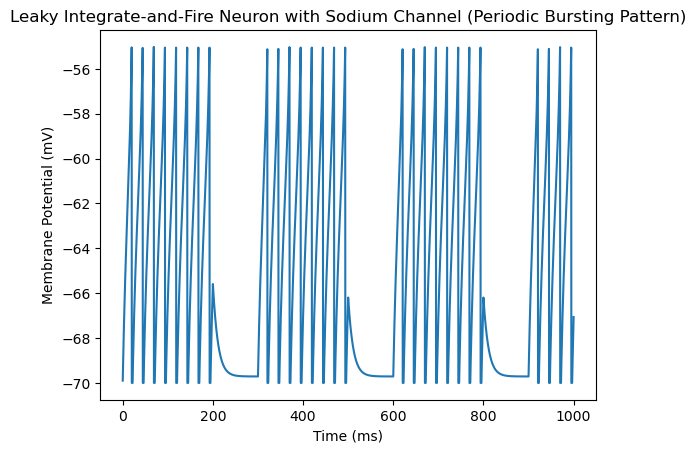

In [14]:
#4. Bursting Pattern
import numpy as np
import matplotlib.pyplot as plt

class LIFNeuron:
    def __init__(self, tau_m, tau_ref, v_rest, v_thresh, sodium_channel_params):
        # Neuron parameters
        self.tau_m = tau_m  # Membrane time constant
        self.tau_ref = tau_ref  # Refractory period
        self.v_rest = v_rest  # Resting potential
        self.v_thresh = v_thresh  # Threshold potential

        # Sodium channel parameters
        self.sodium_channel_params = sodium_channel_params
        self.m = 0.0  # Initial activation variable
        self.h = 1.0  # Initial inactivation variable

        # Neuron state variables
        self.membrane_potential = v_rest  # Initial membrane potential
        self.refractory_time = 0  # Initial refractory time

    def update_sodium_channel(self, dt):
        # Update sodium channel dynamics using Hodgkin-Huxley model
        alpha_m = self.sodium_channel_params['alpha_m'](self.membrane_potential)
        beta_m = self.sodium_channel_params['beta_m'](self.membrane_potential)
        alpha_h = self.sodium_channel_params['alpha_h'](self.membrane_potential)
        beta_h = self.sodium_channel_params['beta_h'](self.membrane_potential)

        dm_dt = alpha_m * (1 - self.m) - beta_m * self.m
        dh_dt = alpha_h * (1 - self.h) - beta_h * self.h

        self.m += dm_dt * dt
        self.h += dh_dt * dt

    def update(self, dt, current_input):
        # Check if the neuron is in a refractory period
        if self.refractory_time > 0:
            # Neuron is in refractory period, reset membrane potential to resting potential
            self.refractory_time -= dt
            self.membrane_potential = self.v_rest
        else:
            # Update sodium channel dynamics
            self.update_sodium_channel(dt)

            # Update membrane potential using leaky integration and sodium channel contribution
            dv = (-(self.membrane_potential - self.v_rest) + current_input + \
                  self.sodium_channel_params['g_Na'] * self.m**3 * self.h * \
                  (self.sodium_channel_params['E_Na'] - self.membrane_potential)) / self.tau_m * dt

            self.membrane_potential += dv

            # Check for threshold crossing
            if self.membrane_potential >= self.v_thresh:
                # Neuron has fired, reset membrane potential to resting potential
                self.membrane_potential = self.v_rest
                # Set refractory period
                self.refractory_time = self.tau_ref

        # Return the updated membrane potential
        return self.membrane_potential

# Sodium channel parameters (Hodgkin-Huxley model)
sodium_channel_params = {
    'alpha_m': lambda v: 0.1 * (v + 40) / (1 - np.exp(-(v + 40) / 10)),
    'beta_m': lambda v: 4.0 * np.exp(-(v + 65) / 18),
    'alpha_h': lambda v: 0.07 * np.exp(-(v + 65) / 20),
    'beta_h': lambda v: 1.0 / (1 + np.exp(-(v + 35) / 10)),
    'g_Na': 120.0,  # Sodium conductance (mS/cm^2)
    'E_Na': 50.0,   # Sodium reversal potential (mV)
}

# Simulation parameters
tau_m = 10.0  # Membrane time constant (ms)
tau_ref = 2.0  # Refractory period (ms)
v_rest = -70.0  # Resting potential (mV)
v_thresh = -55.0  # Threshold potential (mV)
dt = 0.1  # Time step (ms)
sim_time = 1000  # Simulation time (ms)
burst_period = 200  # Burst period (ms)
quiescent_period = 100  # Quiescent period (ms)

# Create LIF neuron with sodium channels
neuron = LIFNeuron(tau_m, tau_ref, v_rest, v_thresh, sodium_channel_params)

# Simulation loop
time_points = np.arange(0, sim_time, dt)
membrane_potentials = []

for t in time_points:
    # Determine input current based on bursting or quiescent period
    if t % (burst_period + quiescent_period) < burst_period:
        input_current = 10.0  # High input current during bursting period
    else:
        input_current = 0.0  # No input current during quiescent period

    # Update neuron and store membrane potential
    membrane_potential = neuron.update(dt, input_current)
    membrane_potentials.append(membrane_potential)

# Plot results
plt.plot(time_points, membrane_potentials)
plt.title('Leaky Integrate-and-Fire Neuron with Sodium Channel (Periodic Bursting Pattern)')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()


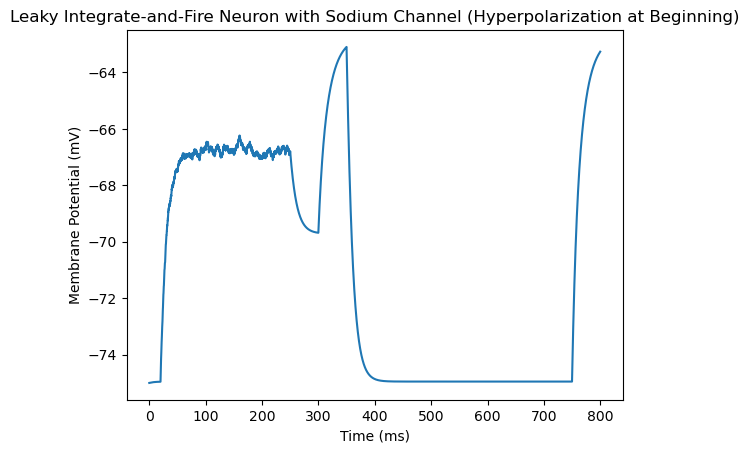

In [31]:
#Graded potentials that don't sum to threshold
import numpy as np
import matplotlib.pyplot as plt

class LIFNeuron:
    def __init__(self, tau_m, tau_ref, v_rest, v_thresh, sodium_channel_params):
        # Neuron parameters
        self.tau_m = tau_m  # Membrane time constant
        self.tau_ref = tau_ref  # Refractory period
        self.v_rest = v_rest  # Resting potential
        self.v_thresh = v_thresh  # Threshold potential

        # Sodium channel parameters
        self.sodium_channel_params = sodium_channel_params
        self.m = 0.0  # Initial activation variable
        self.h = 1.0  # Initial inactivation variable

        # Neuron state variables
        self.membrane_potential = v_rest  # Initial membrane potential
        self.refractory_time = 0  # Initial refractory time

    def update_sodium_channel(self, dt):
        # Update sodium channel dynamics using Hodgkin-Huxley model
        alpha_m = self.sodium_channel_params['alpha_m'](self.membrane_potential)
        beta_m = self.sodium_channel_params['beta_m'](self.membrane_potential)
        alpha_h = self.sodium_channel_params['alpha_h'](self.membrane_potential)
        beta_h = self.sodium_channel_params['beta_h'](self.membrane_potential)

        dm_dt = alpha_m * (1 - self.m) - beta_m * self.m
        dh_dt = alpha_h * (1 - self.h) - beta_h * self.h

        self.m += dm_dt * dt
        self.h += dh_dt * dt

    def update(self, dt, current_input):
        # Check if the neuron is in a refractory period
        if self.refractory_time > 0:
            # Neuron is in refractory period, reset membrane potential to resting potential
            self.refractory_time -= dt
            self.membrane_potential = self.v_rest
        else:
            # Update sodium channel dynamics
            self.update_sodium_channel(dt)

            # Update membrane potential using leaky integration and sodium channel contribution
            dv = (-(self.membrane_potential - self.v_rest) + current_input + \
                  self.sodium_channel_params['g_Na'] * self.m**3 * self.h * \
                  (self.sodium_channel_params['E_Na'] - self.membrane_potential)) / self.tau_m * dt

            self.membrane_potential += dv

            # Check for threshold crossing
            if self.membrane_potential >= self.v_thresh:
                # Neuron has fired, reset membrane potential to resting potential
                self.membrane_potential = self.v_rest
                # Set refractory period
                self.refractory_time = self.tau_ref

        # Return the updated membrane potential
        return self.membrane_potential

# Sodium channel parameters (Hodgkin-Huxley model)
sodium_channel_params = {
    'alpha_m': lambda v: 0.1 * (v + 40) / (1 - np.exp(-(v + 40) / 10)),
    'beta_m': lambda v: 4.0 * np.exp(-(v + 65) / 18),
    'alpha_h': lambda v: 0.07 * np.exp(-(v + 65) / 20),
    'beta_h': lambda v: 1.0 / (1 + np.exp(-(v + 35) / 10)),
    'g_Na': 120.0,  # Sodium conductance (mS/cm^2)
    'E_Na': 50.0,   # Sodium reversal potential (mV)
}

# Simulation parameters
tau_m = 10.0  # Membrane time constant (ms)
tau_ref = 2.0  # Refractory period (ms)
v_rest = -75.0  # Resting potential (mV) - hyperpolarization
v_thresh = -55.0  # Threshold potential (mV)
dt = 0.1  # Time step (ms)
sim_time = 800  # Simulation time (ms)

# Create LIF neuron with sodium channels
neuron = LIFNeuron(tau_m, tau_ref, v_rest, v_thresh, sodium_channel_params)

# Simulation loop
time_points = np.arange(0, sim_time, dt)
membrane_potentials = []

for t in time_points:
    # Inject input current with different amplitudes
    if 20 <= t < 250:
        input_current = np.random.choice([5.0, 10.0])  # Random input currents below and above threshold
    elif 250 <= t < 300:
        input_current = 5.0  # Graded potential below threshold
    elif 300 <= t < 350:
        input_current = 10.0  # Step input current to trigger spike
    elif 750 <= t < 800:
        input_current = 10.0  # Step input current to trigger spike
    else:
        input_current = 0.0  # No input current

    # Update neuron and store membrane potential
    membrane_potential = neuron.update(dt, input_current)
    membrane_potentials.append(membrane_potential)

# Plot results
plt.plot(time_points, membrane_potentials)
plt.title('Leaky Integrate-and-Fire Neuron with Sodium Channel (Hyperpolarization at Beginning)')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()
